In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("GlobalLandTemperaturesByState.csv")

In [3]:
filtered_data = data[['dt', 'AverageTemperature', 'State']]
filtered_data = filtered_data[pd.to_datetime(filtered_data['dt']).dt.year > 2000]
filtered_data = filtered_data[filtered_data['State'].isin(['Wyoming', 'Nebraska', 'South Dakota'])]
print(filtered_data.shape)

(459, 3)


In [4]:
avg_temp_data = filtered_data.groupby('dt')['AverageTemperature'].mean().reset_index()
print(avg_temp_data.head())

           dt  AverageTemperature
0  2001-01-01           -4.480333
1  2001-02-01           -7.541000
2  2001-03-01            0.590333
3  2001-04-01            7.889000
4  2001-05-01           13.908667


In [5]:
import matplotlib.pyplot as plt

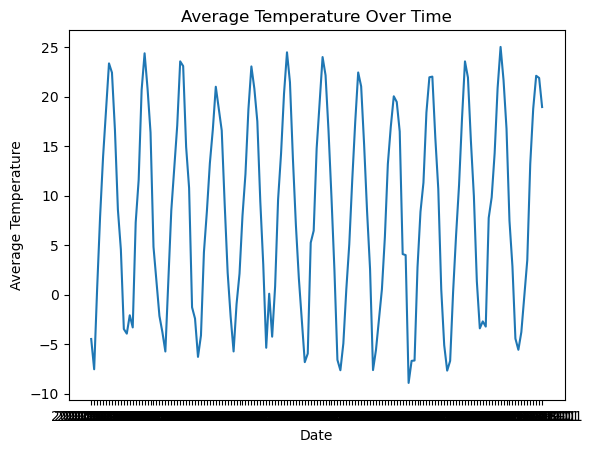

In [6]:
plt.plot(avg_temp_data['dt'], avg_temp_data['AverageTemperature'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time')
plt.show()

In [7]:
avg_temp_data['numerical_date'] = pd.to_datetime(avg_temp_data['dt']).dt.year
print(avg_temp_data.head())

           dt  AverageTemperature  numerical_date
0  2001-01-01           -4.480333            2001
1  2001-02-01           -7.541000            2001
2  2001-03-01            0.590333            2001
3  2001-04-01            7.889000            2001
4  2001-05-01           13.908667            2001


In [9]:
import numpy as np

def model_equation(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
initial_guess = [10, 0.1, 0, 10]

In [10]:
from scipy.optimize import curve_fit

params, covariance = curve_fit(model_equation, avg_temp_data['numerical_date'], avg_temp_data['AverageTemperature'], p0=initial_guess)
print("Parameters:", params)
print("Covariance Matrix:", covariance)

Parameters: [6.78276719e+02 9.73847855e-03 1.79951760e+02 6.86069829e+02]
Covariance Matrix: [[ 1.96267438e+14 -1.48142322e+09  2.97234113e+12  1.96265129e+14]
 [-1.48142322e+09  1.11817569e+04 -2.24351796e+07 -1.48140579e+09]
 [ 2.97234113e+12 -2.24351796e+07  4.50141499e+10  2.97230616e+12]
 [ 1.96265129e+14 -1.48140579e+09  2.97230616e+12  1.96262820e+14]]


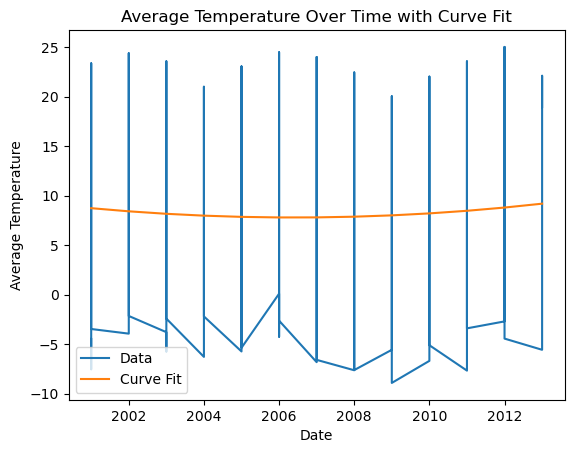

In [11]:
plt.plot(avg_temp_data['numerical_date'], avg_temp_data['AverageTemperature'], label='Data')

plt.plot(avg_temp_data['numerical_date'], model_equation(avg_temp_data['numerical_date'], *params), label='Curve Fit')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Time with Curve Fit')
plt.legend()
plt.show()

In [12]:
errors = np.sqrt(np.diag(covariance))
print("Parameter errors:", errors)

Parameter errors: [1.40095481e+07 1.05743827e+02 2.12165383e+05 1.40093833e+07]


In [13]:
for i, (param, error) in enumerate(zip(params, errors)):
    print(f"Parameter {i+1}: {param} +/- {error}")

print(f"Final Equation: {params[0]} * sin({params[1]} * x + {params[2]}) + {params[3]}")

Parameter 1: 678.2767190311604 +/- 14009548.104274223
Parameter 2: 0.009738478550127974 +/- 105.74382679960677
Parameter 3: 179.95176041627352 +/- 212165.38340571272
Parameter 4: 686.0698286545354 +/- 14009383.267575527
Final Equation: 678.2767190311604 * sin(0.009738478550127974 * x + 179.95176041627352) + 686.0698286545354
